---

# 🌾 Crop Yield Prediction: EDA & Machine Learning Regression

## 📌 Project Overview

Agriculture plays a vital role in food security and economic development. Accurate **crop yield prediction** helps farmers, policymakers, and agribusinesses make informed decisions regarding crop selection, fertilizer usage, irrigation planning, and risk management.

In this notebook, we perform a **complete Exploratory Data Analysis (EDA)** and build **multiple regression models** to predict crop yield (tons per hectare) using soil properties, climatic conditions, geographical factors, and farming practices.

---

## 🎯 Objectives

The main objectives of this project are:

* To understand the dataset through **statistical analysis and visualization**
* To explore relationships between **soil, climate, and yield**
* To handle **outliers, categorical variables, and feature scaling**
* To build and evaluate **10 regression models**
* To identify the **best-performing model**
* To analyze **feature importance** affecting crop yield

---

## 📂 Dataset Description

* **Total Rows:** Multiple agricultural records
* **Total Features:** 20
* **Target Variable:** `Crop_Yield_ton_per_hectare`
* **Feature Types:**

  * Numerical (soil nutrients, weather, geography)
  * Categorical (soil type, region, season, crop type, irrigation)

---

## 🔍 Problem Type

* **Supervised Machine Learning**
* **Regression Problem**

---

## 🛠️ Tools & Technologies

* **Python**
* **Pandas & NumPy** – Data manipulation
* **Matplotlib & Seaborn** – Visualization
* **Scikit-learn** – Preprocessing & ML models
* **XGBoost** – Advanced regression

---

# 📑 Table of Contents (TOC)

### 1️⃣ Data Loading & Initial Exploration

* Import Libraries
* Load Dataset
* Dataset Shape & Info
* Statistical Summary

### 2️⃣ Data Preprocessing

* Identify Numerical & Categorical Columns
* Missing Value Analysis
* Outlier Detection (Boxplot)
* Outlier Removal (IQR Method)

### 3️⃣ Exploratory Data Analysis (EDA)

* Histogram of Numerical Features
* KDE Distribution Plots
* Boxplots for Spread & Outliers
* Categorical Count Plots
* Pie Charts for Categorical Distribution
* Correlation Heatmap

### 4️⃣ Feature Engineering

* Label Encoding for Categorical Features
* Min-Max Scaling for Numerical Features

### 5️⃣ Model Building

* Train-Test Split
* Regression Models:

  * Linear Regression
  * Ridge Regression
  * Lasso Regression
  * ElasticNet
  * Decision Tree
  * Random Forest
  * Gradient Boosting
  * Support Vector Regressor (SVR)
  * KNN Regressor
  * XGBoost Regressor

### 6️⃣ Model Evaluation

* R² Score
* Mean Absolute Error (MAE)
* Root Mean Squared Error (RMSE)
* Model Comparison Table

### 7️⃣ Model Interpretation

* Best Fit Line (Actual vs Predicted)
* Feature Importance Visualization

### 8️⃣ Conclusion & Insights

* Best Performing Model
* Key Factors Affecting Crop Yield
* Practical Agricultural Insights

---

In [5]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv("DataSet\crop-yield.csv")
df.head()

,N,P,K,Soil_pH,Soil_Moisture,Soil_Type,Organic_Carbon,Temperature,Humidity,Rainfall,Sunlight_Hours,Wind_Speed,Region,Altitude,Season,Crop_Type,Irrigation_Type,Fertilizer_Used,Pesticide_Used,Crop_Yield_ton_per_hectare
0,132,62,22,6.35,59.78,Clay,0.43,22.97,53.89,1305.68,7.73,15.96,Central,36,Rabi,Maize,Canal,223.48,23.36,11.42
1,122,71,66,5.98,25.54,Sandy,0.65,17.00,76.90,1942.05,9.25,12.60,North,1561,Rabi,Potato,Canal,161.54,4.42,23.19
2,44,35,104,8.07,25.87,Sandy,0.79,25.52,44.78,2216.20,8.50,15.63,North,1870,Rabi,Rice,Rainfed,184.62,6.29,7.94
3,136,96,113,4.83,42.97,Silt,0.45,18.59,31.89,607.18,8.75,5.49,East,765,Kharif,Sugarcane,Rainfed,274.02,2.72,72.53
4,101,34,42,5.84,48.01,Silt,0.69,22.74,46.27,483.47,8.00,7.44,Central,1143,Zaid,Wheat,Rainfed,72.69,15.37,6.72


In [8]:
df.shape


(10000, 20)

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   N                           10000 non-null  int64  
 1   P                           10000 non-null  int64  
 2   K                           10000 non-null  int64  
 3   Soil_pH                     10000 non-null  float64
 4   Soil_Moisture               10000 non-null  float64
 5   Soil_Type                   10000 non-null  object 
 6   Organic_Carbon              10000 non-null  float64
 7   Temperature                 10000 non-null  float64
 8   Humidity                    10000 non-null  float64
 9   Rainfall                    10000 non-null  float64
 10  Sunlight_Hours              10000 non-null  float64
 11  Wind_Speed                  10000 non-null  float64
 12  Region                      10000 non-null  object 
 13  Altitude                    1000

In [10]:
df.describe()


,N,P,K,Soil_pH,Soil_Moisture,Organic_Carbon,Temperature,Humidity,Rainfall,Sunlight_Hours,Wind_Speed,Altitude,Fertilizer_Used,Pesticide_Used,Crop_Yield_ton_per_hectare
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,104.983000,56.809600,85.008700,6.504306,40.083748,0.958356,25.097402,59.894209,1546.694887,7.507868,9.503192,1103.357200,205.986246,12.525571,22.342801
std,43.291654,24.522962,37.541443,0.978698,14.461944,0.375027,8.719031,17.402450,718.865960,2.006472,4.911870,636.513856,83.607922,7.215035,23.986065
min,30.000000,15.000000,20.000000,4.800000,15.000000,0.300000,10.000000,30.010000,300.700000,4.000000,1.000000,0.000000,60.000000,0.000000,1.760000
25%,68.000000,35.000000,52.000000,5.670000,27.630000,0.630000,17.590000,44.830000,925.767500,5.770000,5.230000,550.000000,133.337500,6.310000,8.280000
50%,105.000000,57.000000,85.000000,6.520000,40.000000,0.960000,24.970000,59.550000,1548.550000,7.530000,9.520000,1106.000000,205.820000,12.440000,10.270000
75%,142.000000,78.000000,118.000000,7.350000,52.762500,1.290000,32.830000,75.037500,2165.452500,9.220000,13.710000,1655.250000,278.090000,18.760000,24.750000
max,179.000000,99.000000,149.000000,8.200000,64.990000,1.600000,40.000000,89.990000,2799.260000,11.000000,18.000000,2199.000000,349.960000,25.000000,80.990000


In [31]:
target = 'Crop_Yield_ton_per_hectare'

categorical_cols = ['Soil_Type','Region','Season','Crop_Type','Irrigation_Type']
numerical_cols = [col for col in df.columns if col not in categorical_cols + [target]]


In [12]:
df.isnull().sum()


N                             0
P                             0
K                             0
Soil_pH                       0
Soil_Moisture                 0
Soil_Type                     0
Organic_Carbon                0
Temperature                   0
Humidity                      0
Rainfall                      0
Sunlight_Hours                0
Wind_Speed                    0
Region                        0
Altitude                      0
Season                        0
Crop_Type                     0
Irrigation_Type               0
Fertilizer_Used               0
Pesticide_Used                0
Crop_Yield_ton_per_hectare    0
dtype: int64

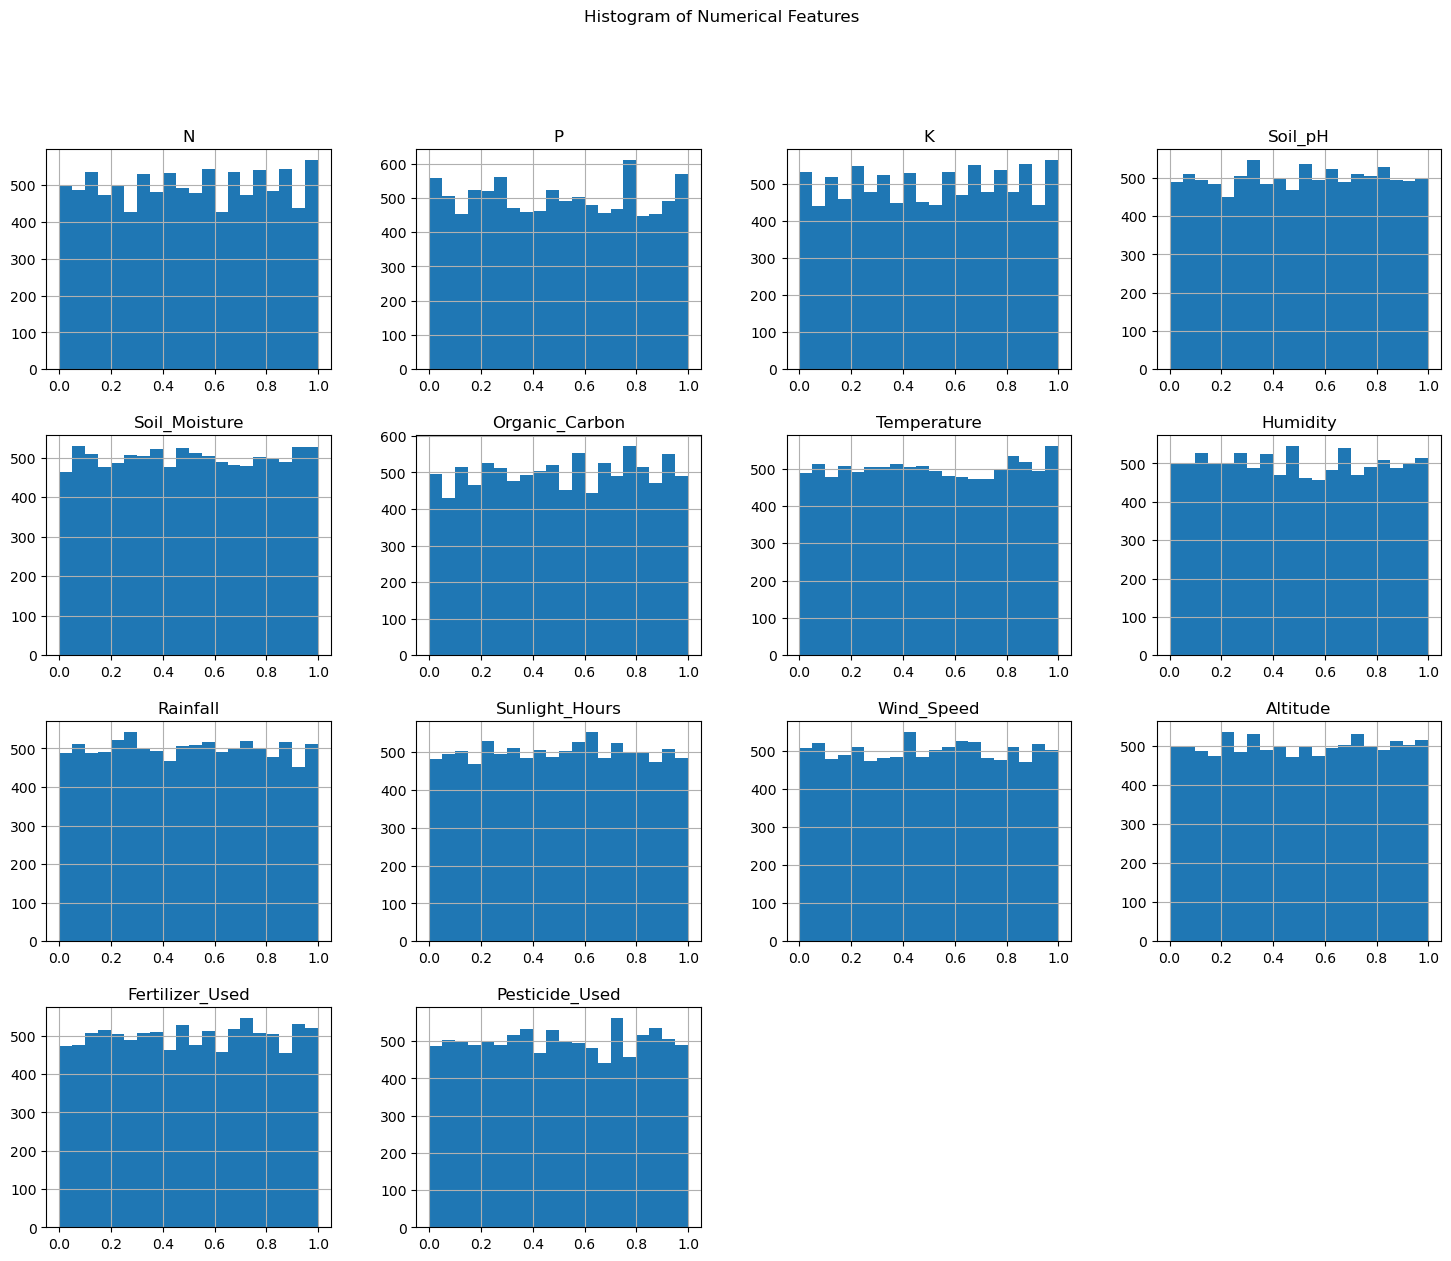

In [33]:
df[numerical_cols].hist(figsize=(18,14), bins=20)
plt.suptitle("Histogram of Numerical Features")
plt.show()


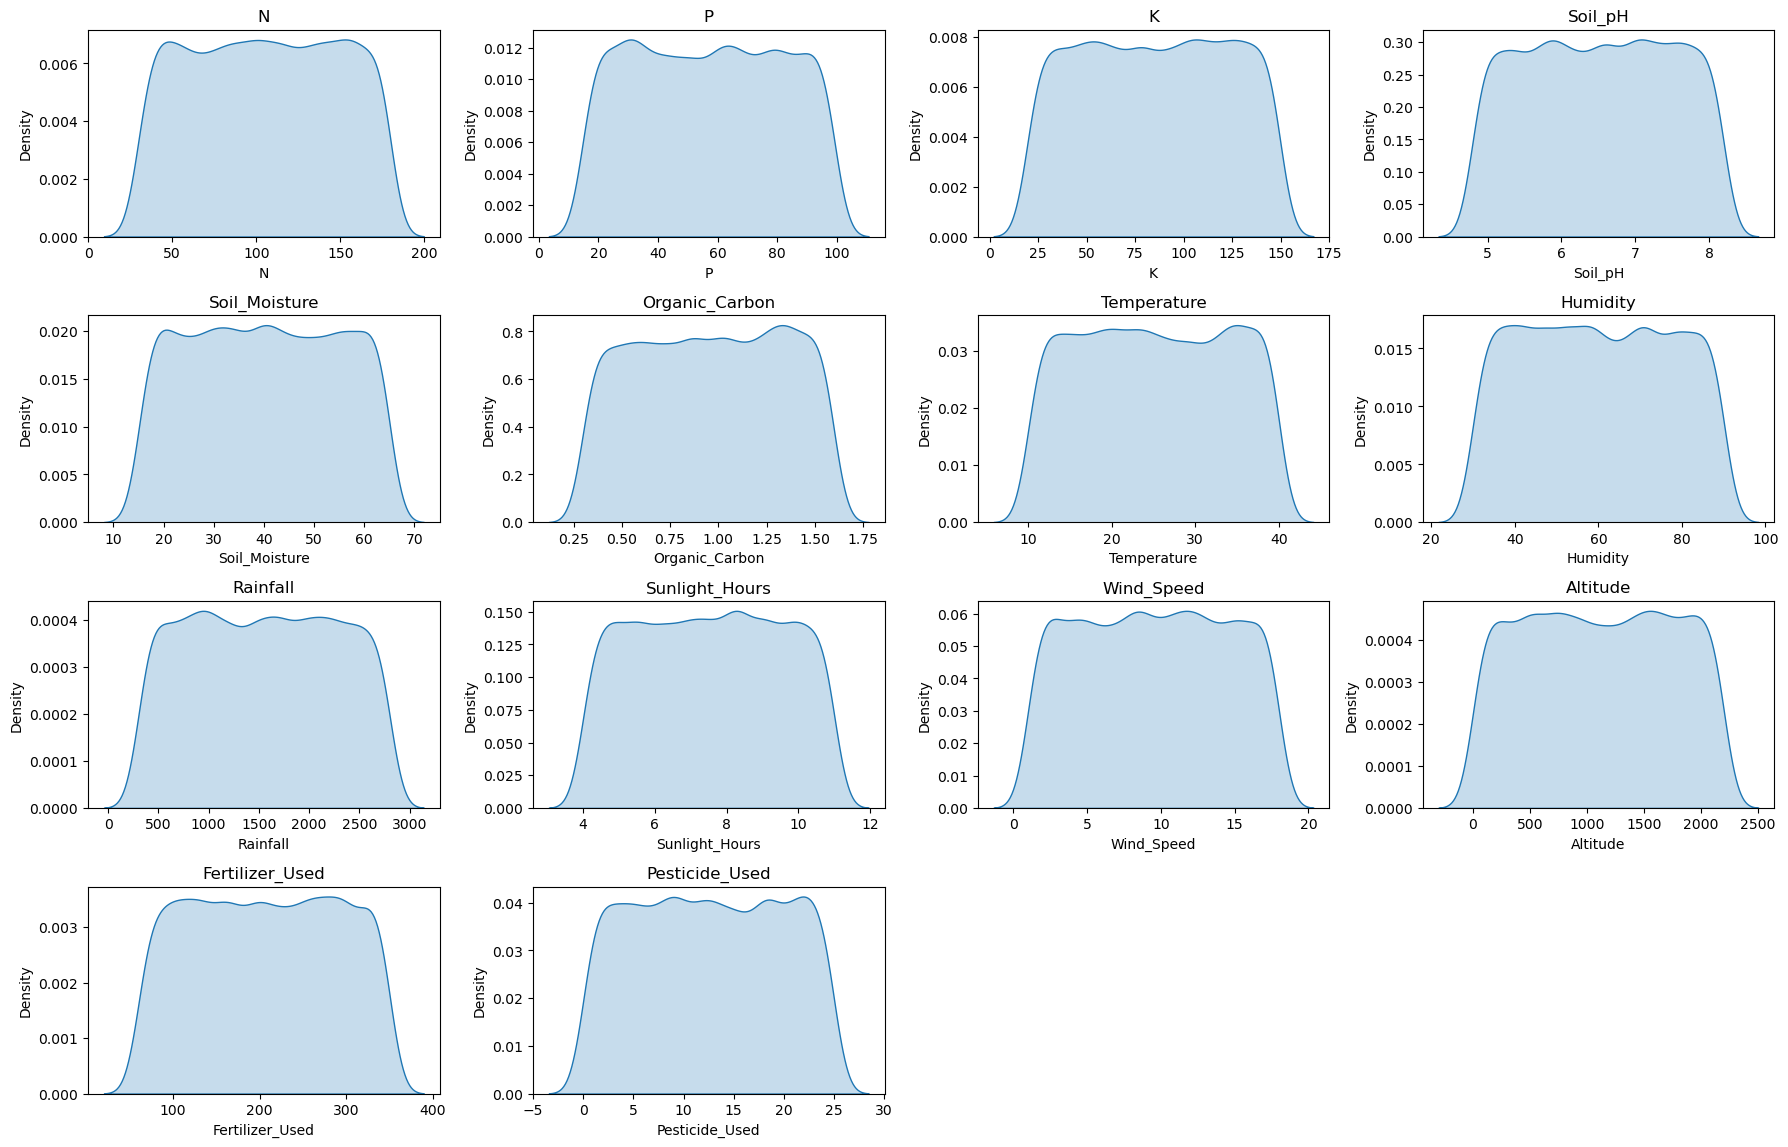

In [14]:
plt.figure(figsize=(18,14))
for i, col in enumerate(numerical_cols):
    plt.subplot(5,4,i+1)
    sns.kdeplot(df[col], fill=True)
    plt.title(col)
plt.tight_layout()
plt.show()


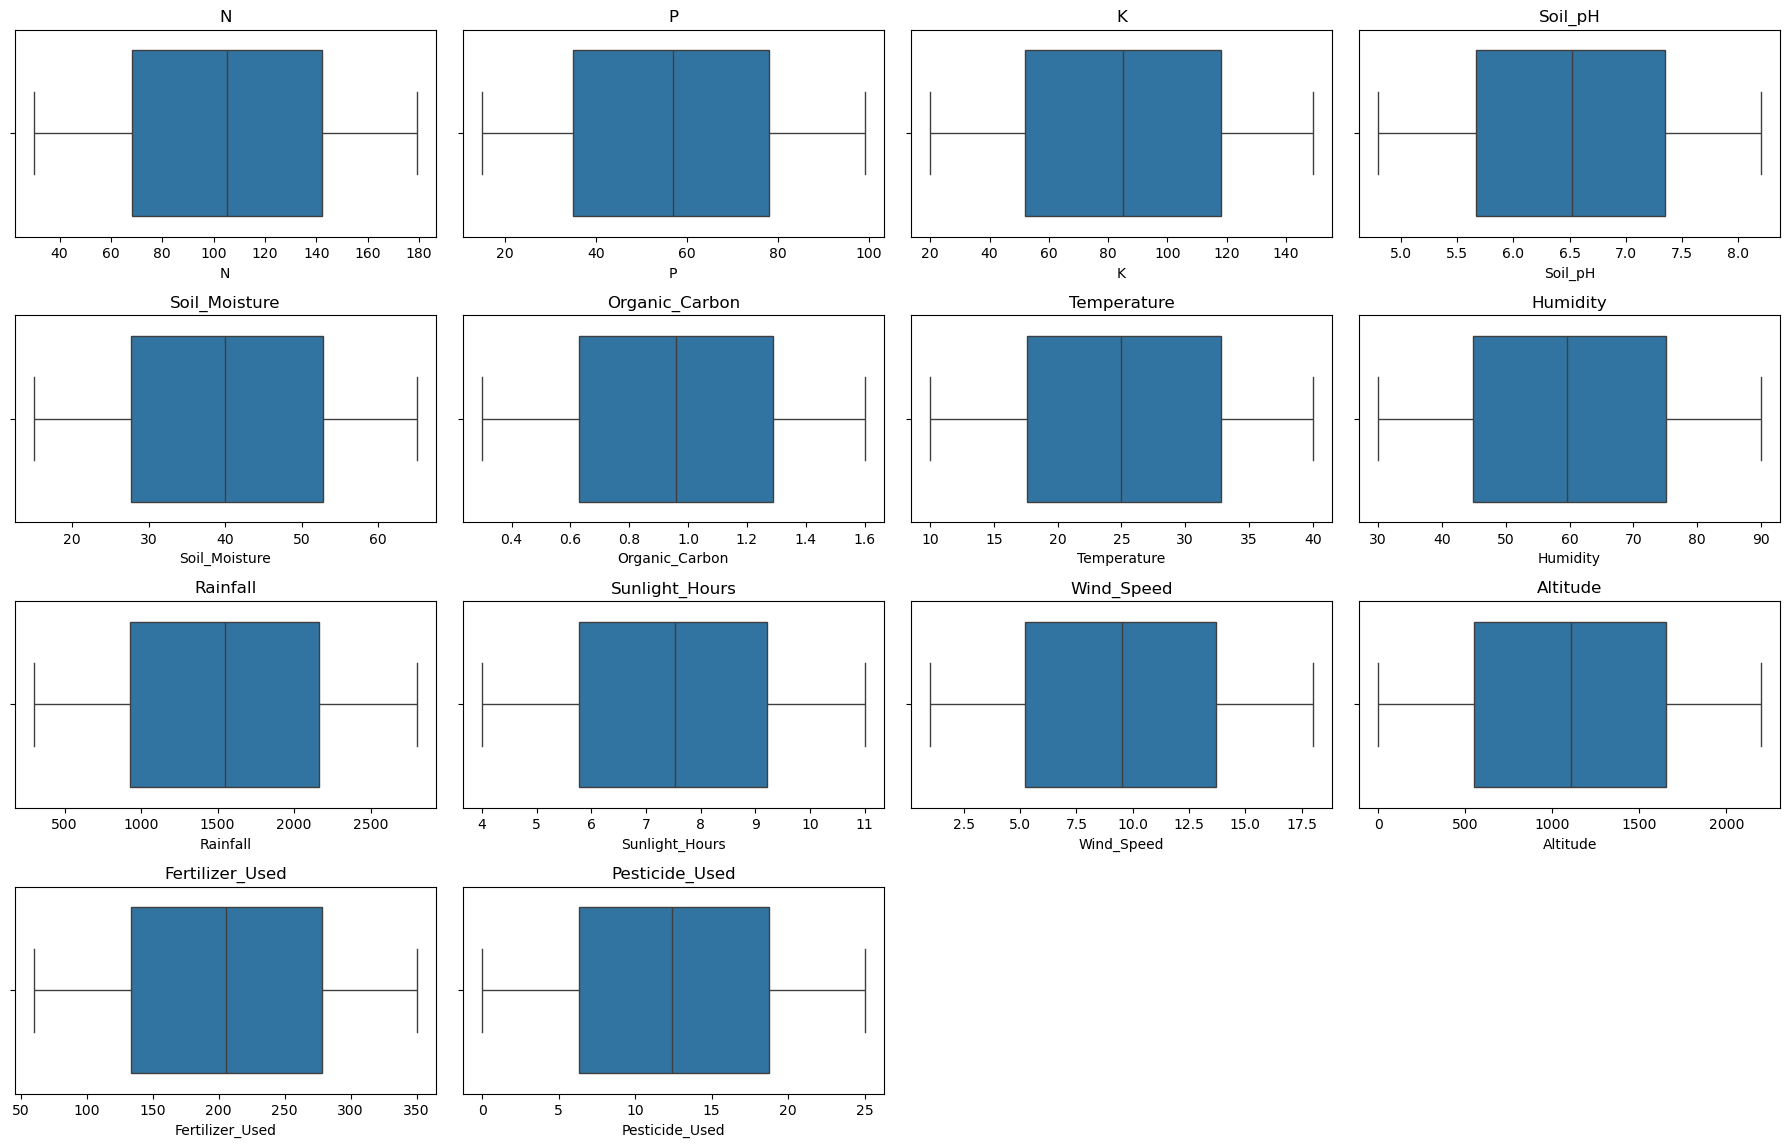

In [15]:
plt.figure(figsize=(18,14))
for i, col in enumerate(numerical_cols):
    plt.subplot(5,4,i+1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [16]:
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df = df[(df[col] >= lower) & (df[col] <= upper)]


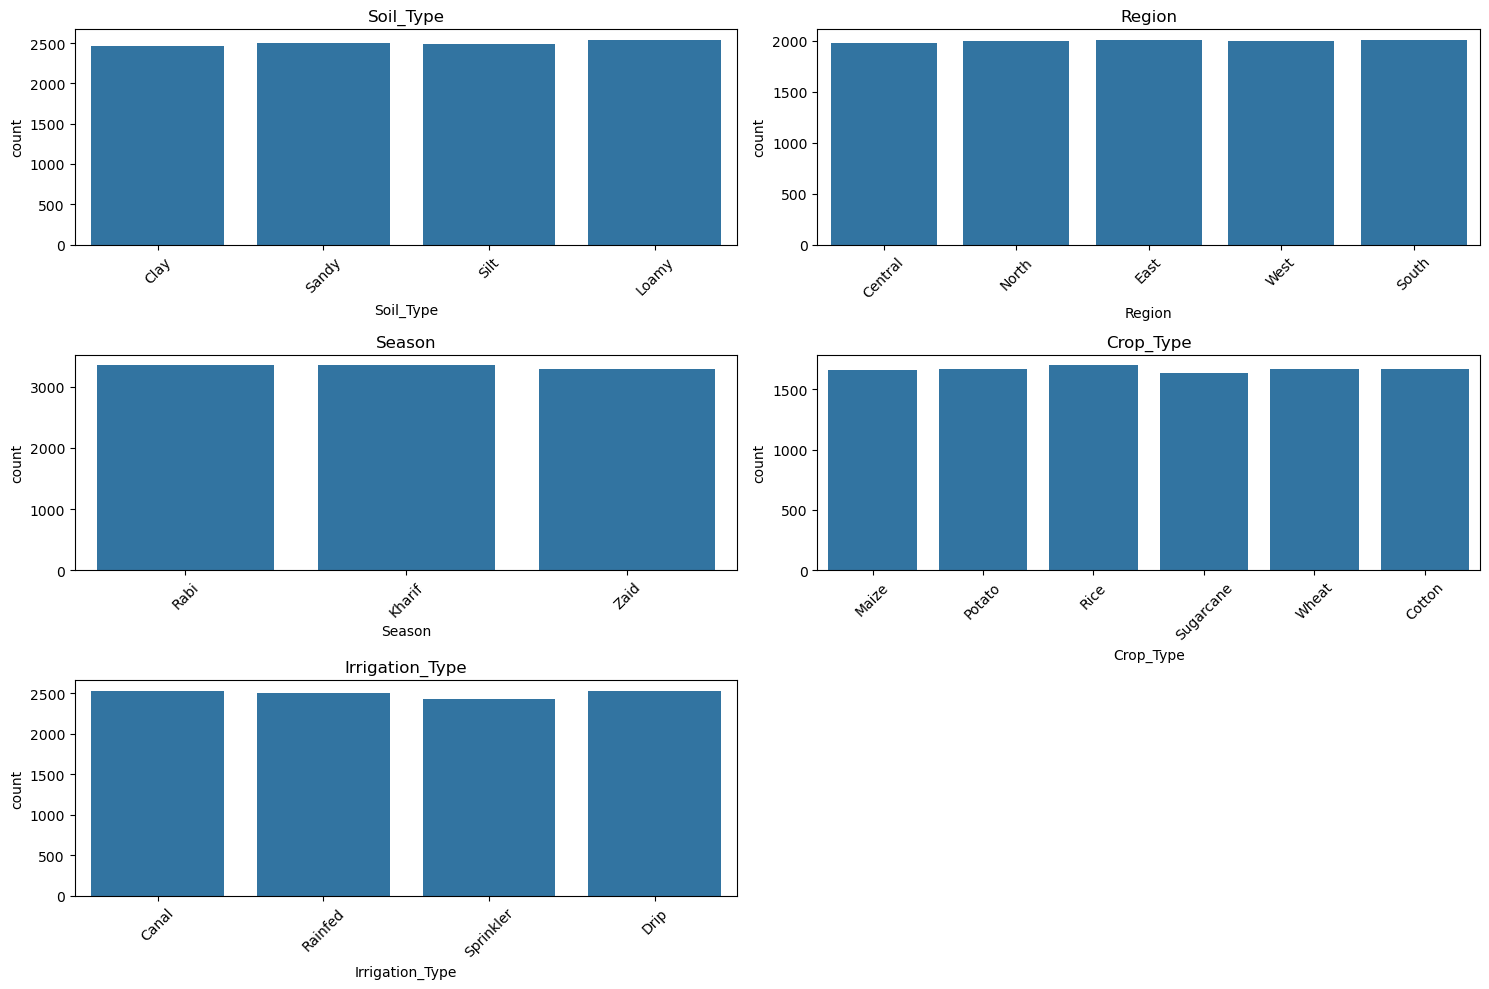

In [17]:
plt.figure(figsize=(15,10))
for i, col in enumerate(categorical_cols):
    plt.subplot(3,2,i+1)
    sns.countplot(x=df[col])
    plt.xticks(rotation=45)
    plt.title(col)
plt.tight_layout()
plt.show()


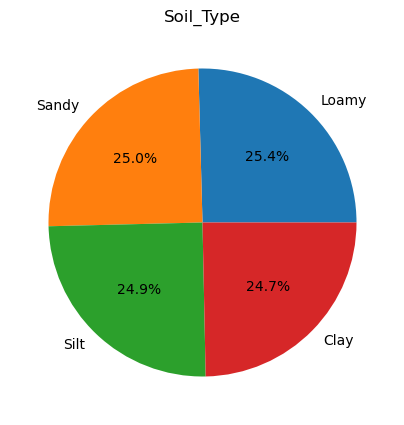

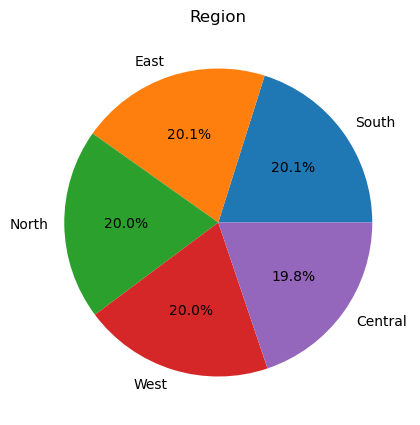

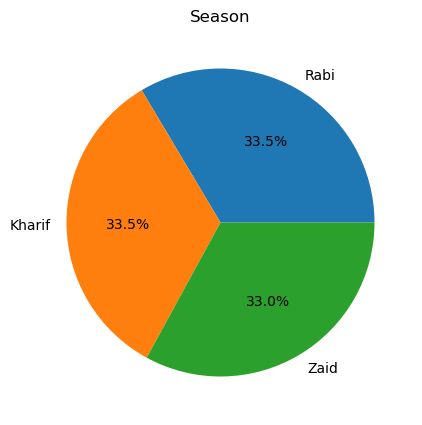

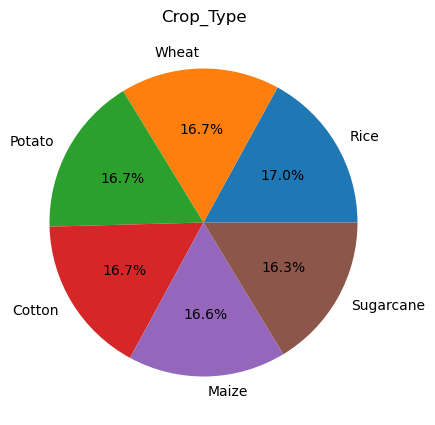

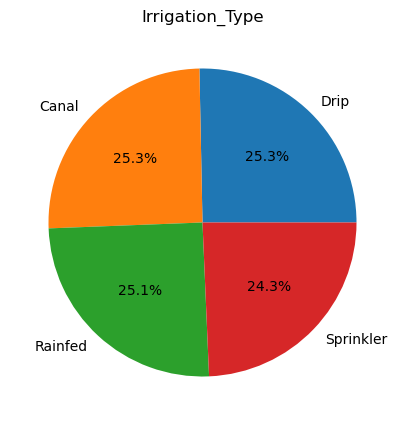

In [18]:
for col in categorical_cols:
    df[col].value_counts().plot.pie(
        autopct='%1.1f%%',
        figsize=(5,5),
        title=col
    )
    plt.ylabel("")
    plt.show()


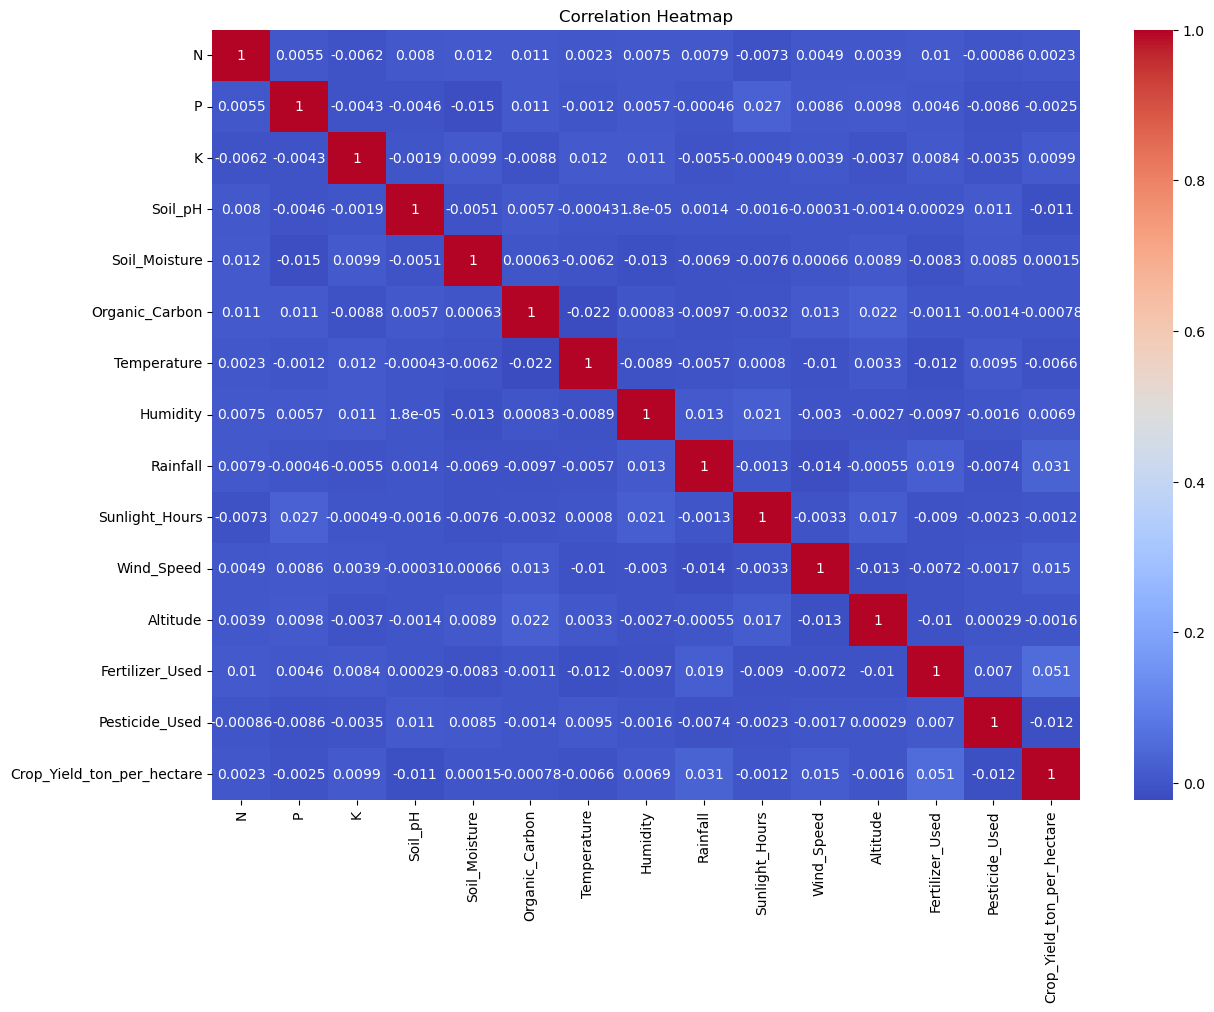

In [19]:
plt.figure(figsize=(14,10))
sns.heatmap(df[numerical_cols + [target]].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [20]:
le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [21]:
scaler = MinMaxScaler()

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [22]:
X = df.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [23]:
models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "GradientBoost": GradientBoostingRegressor(),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(),
    "XGBoost": XGBRegressor(objective='reg:squarederror')
}


In [24]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    r2 = r2_score(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    
    results.append([name, r2, mae, rmse])

results_df = pd.DataFrame(results, columns=['Model','R2','MAE','RMSE'])
results_df.sort_values(by='R2', ascending=False)


,Model,R2,MAE,RMSE
6,GradientBoost,0.997939,0.874847,1.095966
9,XGBoost,0.997842,0.892580,1.121542
5,RandomForest,0.997801,0.908328,1.132218
4,DecisionTree,0.995388,1.303990,1.639596
8,KNN,0.900846,4.272748,7.602273
2,Lasso,0.134184,16.621088,22.464739
1,Ridge,0.133917,16.565346,22.468206
0,Linear,0.133909,16.565416,22.468317
3,ElasticNet,0.130991,16.797114,22.506127
7,SVR,0.085870,12.977733,23.083019


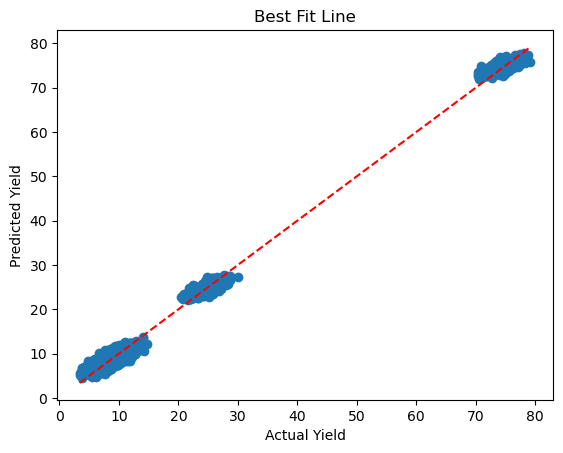

In [25]:
best_model = RandomForestRegressor()
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Best Fit Line")
plt.show()


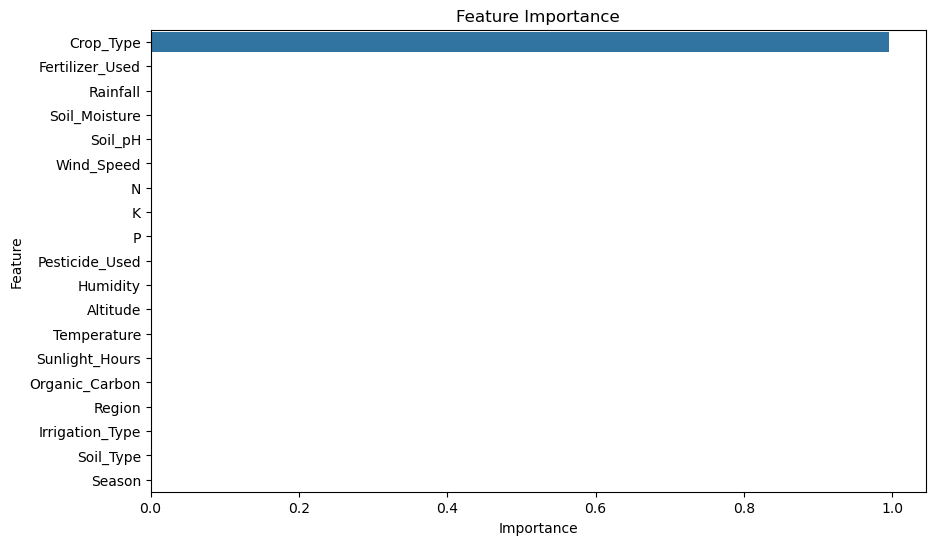

In [26]:
importances = best_model.feature_importances_
features = X.columns

fi = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=fi)
plt.title("Feature Importance")
plt.show()


In [27]:
results_df


,Model,R2,MAE,RMSE
0,Linear,0.133909,16.565416,22.468317
1,Ridge,0.133917,16.565346,22.468206
2,Lasso,0.134184,16.621088,22.464739
3,ElasticNet,0.130991,16.797114,22.506127
4,DecisionTree,0.995388,1.303990,1.639596
5,RandomForest,0.997801,0.908328,1.132218
6,GradientBoost,0.997939,0.874847,1.095966
7,SVR,0.085870,12.977733,23.083019
8,KNN,0.900846,4.272748,7.602273
9,XGBoost,0.997842,0.892580,1.121542
